In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from midi_utils.plots import plot_record_speed
from midi_utils.preprocessing import create_time_features

%reload_ext autoreload
%autoreload 2

In [2]:
# loading
dataset = load_dataset("roszcz/internship-midi-data-science", split="train")
record = dataset[0]
df = pd.DataFrame(record["notes"]).sort_values(by='start')
df = create_time_features(df)
df

,end,pitch,start,velocity,duration,second,minute
0,2.058438,42,1.934219,74,0.124219,1,0
1,2.990469,66,1.935573,84,1.054896,1,0
2,2.044531,30,1.948229,76,0.096302,1,0
3,2.613073,49,2.556146,77,0.056927,2,0
4,2.618333,54,2.564844,59,0.053490,2,0
...,...,...,...,...,...,...,...
88882,10856.278125,82,10856.155208,54,0.122917,10856,180
88883,10856.724115,65,10856.187188,36,0.536927,10856,180
88884,10856.875625,70,10856.732500,34,0.143125,10856,180
88885,10856.849063,89,10856.750156,57,0.098906,10856,180


# Number of notes playerd per second in a record

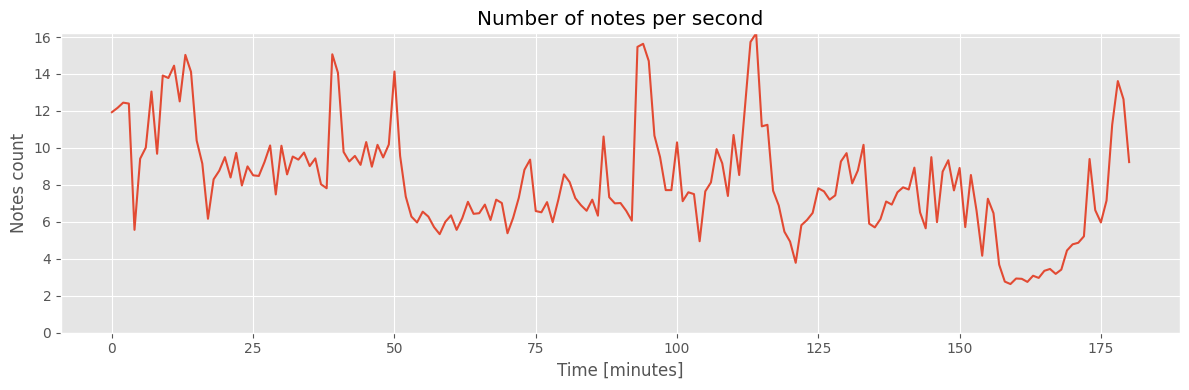

In [3]:
plot_record_speed(df)

# Number of notes pressed at the same time

### Equal intervals grouping, CHORDY TO NIE POJEDYNCE NUDY TYLKO ICH ZBIOR

In [13]:
# from chorder import Chord
# Chord()

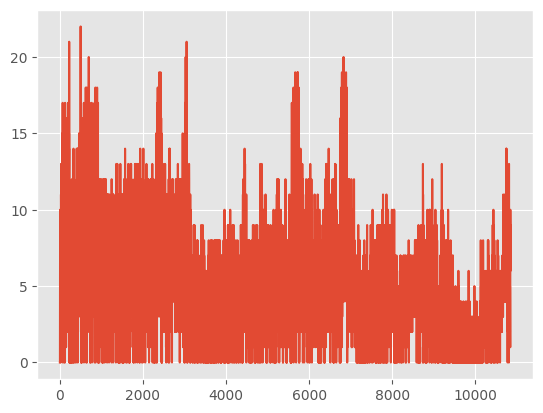

In [27]:
sample = df#.iloc[:120, :]

# naiwne grupowanie po .5 sekundy
max_duration = int(sample['end'].max())
time_interval = np.arange(0, int(sample['end'].max()), 1).tolist()
interval1, interval2 = time_interval[:-1], time_interval[1:]

# counting unique pitches in specified time intervals
occurences = [{
    'start': t1, 'end': t2,
    'pitches': sample[(sample['start'] > t1) & (sample['end'] <= t2)]['pitch'].unique() 
    } for t1, t2 in zip(interval1, interval2)
]

occurences = pd.DataFrame(occurences, )
occurences['counts'] = occurences.apply(lambda x: len(x['pitches']), axis=1)

# jakos to inaczej zagregowac moze?
plt.plot(occurences['counts'])

In [28]:
sample_df = df.iloc[:1000]

for idx, row in sample_df.iterrows():
    print(row)
    break
    # current_time = 

end          2.058438
pitch       42.000000
start        1.934219
velocity    74.000000
duration     0.124219
second       1.000000
minute       0.000000
Name: 0, dtype: float64


In [28]:
1+1

2